In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import seaborn as sbn
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_test=pd.read_csv('test.csv')



In [2]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageYrBlt      78  0.053461
GarageQual       78  0.053461
GarageFinish     78  0.053461
GarageCond       78  0.053461
GarageType       76  0.052090
BsmtCond         45  0.030843
BsmtQual         44  0.030158
BsmtExposure     44  0.030158
BsmtFinType1     42  0.028787
BsmtFinType2     42  0.028787
MasVnrType       16  0.010966
MasVnrArea       15  0.010281
MSZoning          4  0.002742
BsmtHalfBath      2  0.001371

In [3]:
df_test = df_test.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_test = df_test.drop(df_test.loc[df_test['Electrical'].isnull()].index)
df_test.isnull().sum().max() #just checking that there's no missing data missing...

1

In [4]:
df_test.dropna(inplace=True)

Skewness: 1.129513
Kurtosis: 2.914932


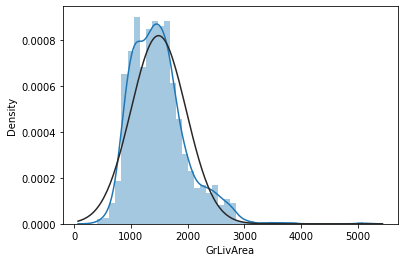

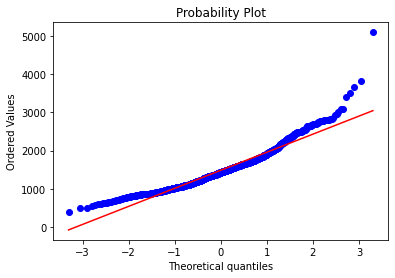

In [5]:
sbn.distplot(df_test['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_test['GrLivArea'], plot=plt)
print("Skewness: %f" % df_test['GrLivArea'].skew())
print("Kurtosis: %f" % df_test['GrLivArea'].kurt())

Skewness: 0.026584
Kurtosis: 0.113929


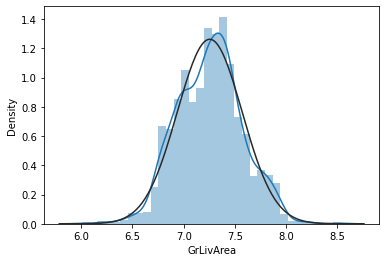

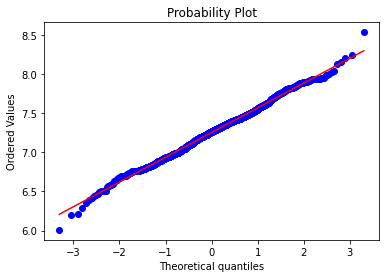

In [6]:
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])
sbn.distplot(df_test['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_test['GrLivArea'], plot=plt)
print("Skewness: %f" % df_test['GrLivArea'].skew())
print("Kurtosis: %f" % df_test['GrLivArea'].kurt())

Skewness: 0.814110
Kurtosis: 5.206484


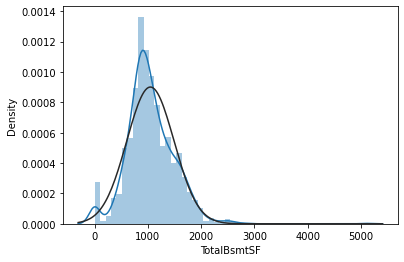

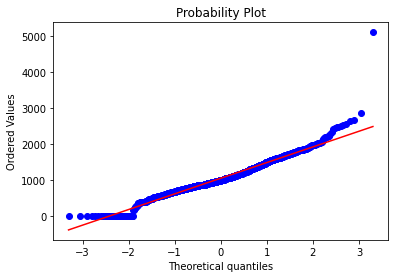

In [7]:
sbn.distplot(df_test['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_test['TotalBsmtSF'], plot=plt)
print("Skewness: %f" % df_test['TotalBsmtSF'].skew())
print("Kurtosis: %f" % df_test['TotalBsmtSF'].kurt())

OverflowError: cannot convert float infinity to integer

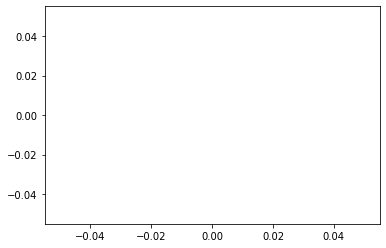

In [8]:
df_test['TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])
sbn.distplot(df_test['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_test['TotalBsmtSF'], plot=plt)
print("Skewness: %f" % df_test['TotalBsmtSF'].skew())
print("Kurtosis: %f" % df_test['TotalBsmtSF'].kurt())

In [ ]:
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)
df_test['HasBsmt'] = 0 
df_test.loc[df_test['TotalBsmtSF']>0,'HasBsmt'] = 1

df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

In [9]:
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)
df_test['HasBsmt'] = 0 
df_test.loc[df_test['TotalBsmtSF']>0,'HasBsmt'] = 1

df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

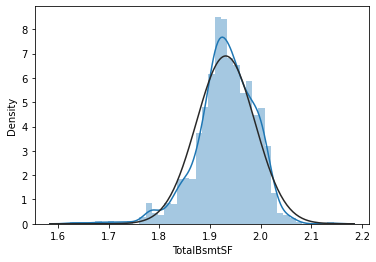

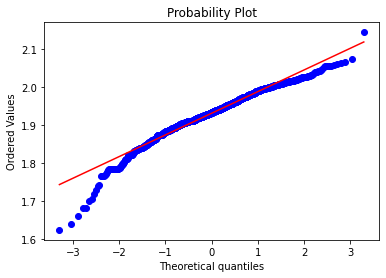

In [10]:
sbn.distplot(df_test[df_test['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_test[df_test['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [14]:
df_test.shape

(1454, 192)

In [11]:
df_test = pd.get_dummies(df_test)

In [12]:
df_test

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0     1461          20    11622            5            6       1961   
1     1462          20    14267            6            6       1958   
2     1463          60    13830            5            5       1997   
3     1464          60     9978            6            6       1998   
4     1465         120     5005            8            5       1992   
...    ...         ...      ...          ...          ...        ...   
1454  2915         160     1936            4            7       1970   
1455  2916         160     1894            4            5       1970   
1456  2917          20    20000            5            7       1960   
1457  2918          85    10441            5            5       1992   
1458  2919          60     9627            7            5       1993   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0             1961       468.0       144.0      270.0  ...               0   
1             1958       923.0         0.0      406.0  ...               0   
2             1998       791.0         0.0      137.0  ...               0   
3             1998       602.0         0.0      324.0  ...               0   
4             1992       263.0         0.0     1017.0  ...               0   
...            ...         ...         ...        ...  ...             ...   
1454          1970         0.0         0.0      546.0  ...               0   
1455          1970       252.0         0.0      294.0  ...               0   
1456          1996      1224.0         0.0        0.0  ...               0   
1457          1992       337.0         0.0      575.0  ...               0   
1458          1994       758.0         0.0      238.0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      0   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1454             0             0            1                      0   
1455             0             0            1                      1   
1456             0             0            1                      1   
1457             0             0            1                      0   
1458             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1454                      0                     0                     0   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        1                      0  
4                        1                      0  
...                    ...                    ...  
1454                     1                      0  
1455                    

In [13]:
df_test.to_csv('C:/Users/mehmu/Desktop/PyProjects/Projects/Unlocked/KaggleComp/KaggleHouse/model_recreation/mr_test.csv')